In [1]:
import numpy as np

# np.where()

# Case_1
- np.where(condition)
- It returns the indxes of the elements where the condition is True.
- To fetch the elements we pass np.where() as the index to the array object.

In [2]:
arr=np.random.randint(10,100,12).reshape(3,4)

In [3]:
arr

array([[73, 64, 74, 80],
       [45, 75, 12, 74],
       [32, 87, 74, 39]])

In [4]:
np.where(arr>50)

(array([0, 0, 0, 0, 1, 1, 2, 2], dtype=int64),
 array([0, 1, 2, 3, 1, 3, 1, 2], dtype=int64))

In [6]:
arr[np.where(arr>50)]

array([73, 64, 74, 80, 75, 74, 87, 74])

In [8]:
arr[np.where(arr%2==0)]

array([64, 74, 80, 12, 74, 32, 74])

In [13]:
arr[np.where((arr>50)|(arr<30))]

array([73, 64, 74, 80, 75, 12, 74, 87, 74])

In [12]:
# Logical operators- and, or not
# Bitwise operators- &, |, ~ (Numpy supported)

# Case_2
- np.where(condition,x,y)

- If the contition is True then x is the result. 
- If the condition is False then y is the result.

In [14]:
arr

array([[73, 64, 74, 80],
       [45, 75, 12, 74],
       [32, 87, 74, 39]])

In [15]:
# All the numbers greater than 60 should be 1
# All the numbers less than 60 should be 0

In [16]:
np.where(arr>60,1,0)

array([[1, 1, 1, 1],
       [0, 1, 0, 1],
       [0, 1, 1, 0]])

# Case_3
- np.where(condition,x,arr)

- If the condition is True then x is the result.
- If the condition is False then the value remains as it is.

In [17]:
arr

array([[73, 64, 74, 80],
       [45, 75, 12, 74],
       [32, 87, 74, 39]])

In [18]:
# All the numbers greater than 60 should be 1
# All the numbers less than 60 should remain as they are.

In [19]:
np.where(arr>60,1,arr)

array([[ 1,  1,  1,  1],
       [45,  1, 12,  1],
       [32,  1,  1, 39]])

# Capping the values

In [23]:
np.random.seed(10)
arr=np.random.randint(10,100,15).reshape(3,5)
arr

array([[19, 25, 74, 38, 99],
       [39, 18, 83, 10, 50],
       [46, 26, 21, 64, 98]])

In [24]:
# Cap the values of the above array between 40 and 70
# Any value less than 30 -> 30
# Any value greater than 80 -> 80

In [26]:
arr2=np.where(arr>80,80,arr)
arr2

array([[19, 25, 74, 38, 80],
       [39, 18, 80, 10, 50],
       [46, 26, 21, 64, 80]])

In [29]:
np.where(arr2<30,30,arr2)

array([[30, 30, 74, 38, 80],
       [39, 30, 80, 30, 50],
       [46, 30, 30, 64, 80]])

In [30]:
arr

array([[19, 25, 74, 38, 99],
       [39, 18, 83, 10, 50],
       [46, 26, 21, 64, 98]])

In [31]:
np.where(arr<30,30,np.where(arr>80,80,arr))

array([[30, 30, 74, 38, 80],
       [39, 30, 80, 30, 50],
       [46, 30, 30, 64, 80]])

In [32]:
import seaborn as sns

In [33]:
ti=sns.load_dataset('titanic')
ti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:ylabel='age'>

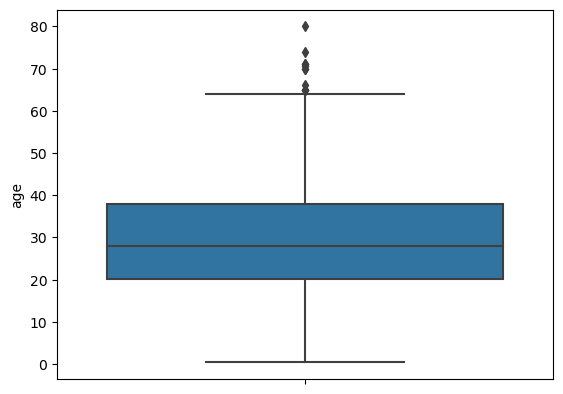

In [34]:
sns.boxplot(y='age',data=ti)

In [35]:
ti.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [39]:
ti.age.fillna(ti.age.mean(),inplace=True)

In [40]:
# Cap the values between 5 and 60

In [42]:
ti['New_age']=np.where(ti.age>60,60,np.where(ti.age<5,5,ti.age))

In [43]:
ti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,New_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0


<AxesSubplot:ylabel='New_age'>

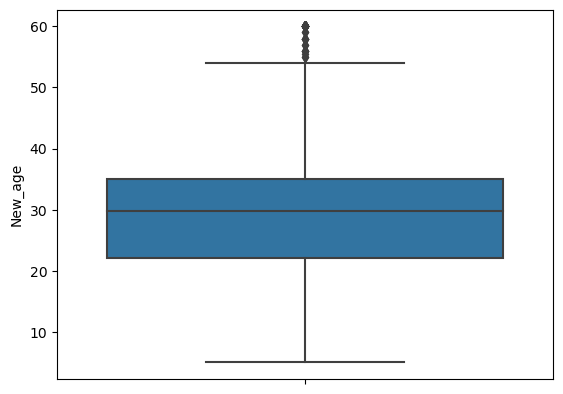

In [44]:
sns.boxplot(y='New_age',data=ti)

In [46]:
ti.New_age.describe()

count    891.000000
mean      29.673674
std       12.330167
min        5.000000
25%       22.000000
50%       29.699118
75%       35.000000
max       60.000000
Name: New_age, dtype: float64

# np.clip()

- It is used to cap the values.

In [53]:
# np.clip(arr,lower_limit,upper_limit)

In [48]:
arr

array([[19, 25, 74, 38, 99],
       [39, 18, 83, 10, 50],
       [46, 26, 21, 64, 98]])

In [49]:
# Cap the values between 30 and 70

In [52]:
np.clip(arr,30,70)

array([[30, 30, 70, 38, 70],
       [39, 30, 70, 30, 50],
       [46, 30, 30, 64, 70]])

# Conditional statements on arrays

In [54]:
arr

array([[19, 25, 74, 38, 99],
       [39, 18, 83, 10, 50],
       [46, 26, 21, 64, 98]])

In [56]:
# condition- Boolean array
# arr[condition]- Values

In [57]:
arr>60

array([[False, False,  True, False,  True],
       [False, False,  True, False, False],
       [False, False, False,  True,  True]])

In [59]:
arr[arr>60]

array([74, 99, 83, 64, 98])

In [60]:
arr

array([[19, 25, 74, 38, 99],
       [39, 18, 83, 10, 50],
       [46, 26, 21, 64, 98]])

In [63]:
# Fetch the values that are divisible by 2 and 5 both

(arr%5==0)&(arr%2==0)

array([[False, False, False, False, False],
       [False, False, False,  True,  True],
       [False, False, False, False, False]])

In [64]:
arr[(arr%5==0)&(arr%2==0)]

array([10, 50])

# Array is mutable

In [65]:
arr

array([[19, 25, 74, 38, 99],
       [39, 18, 83, 10, 50],
       [46, 26, 21, 64, 98]])

In [66]:
# 19 -> 1000

In [68]:
arr[0,0]=1000

In [69]:
arr

array([[1000,   25,   74,   38,   99],
       [  39,   18,   83,   10,   50],
       [  46,   26,   21,   64,   98]])

In [72]:
arr[arr>70]=0

In [73]:
arr

array([[ 0, 25,  0, 38,  0],
       [39, 18,  0, 10, 50],
       [46, 26, 21, 64,  0]])

# Array concatenation

- 1- Vertical concatenation
- 2- Horizontal concatenation

In [80]:
# np.concatenate((x,y),axis=0/1)

In [74]:
x=np.arange(1,10).reshape(3,3)
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [76]:
x.shape

(3, 3)

In [78]:
y=np.array([10,20,30]).reshape(1,3)
y

array([[10, 20, 30]])

In [79]:
y.shape

(1, 3)

In [81]:
np.concatenate((x,y),axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 20, 30]])

In [82]:
np.concatenate((x,y))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 20, 30]])

In [84]:
# np.concatenate((x,y),axis=1)

In [85]:
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [86]:
y=np.array([10,20,30]).reshape(3,1)
y

array([[10],
       [20],
       [30]])

In [87]:
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [92]:
np.concatenate((x,y),axis=1)

array([[ 1,  2,  3, 10],
       [ 4,  5,  6, 20],
       [ 7,  8,  9, 30]])

In [93]:
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [94]:
y=np.array([10,20,30,40,50,60,70,80,90]).reshape(3,3)
y

array([[10, 20, 30],
       [40, 50, 60],
       [70, 80, 90]])

In [95]:
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [97]:
np.concatenate((x,y),axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 20, 30],
       [40, 50, 60],
       [70, 80, 90]])

In [98]:
np.concatenate((x,y),axis=1)

array([[ 1,  2,  3, 10, 20, 30],
       [ 4,  5,  6, 40, 50, 60],
       [ 7,  8,  9, 70, 80, 90]])

# Array sorting

In [108]:
# np.sort(arr)
# arr.sort()

In [102]:
r=arr.ravel()

In [103]:
r

array([ 0, 25,  0, 38,  0, 39, 18,  0, 10, 50, 46, 26, 21, 64,  0])

In [105]:
np.sort(r)

array([ 0,  0,  0,  0,  0, 10, 18, 21, 25, 26, 38, 39, 46, 50, 64])

In [106]:
r

array([ 0, 25,  0, 38,  0, 39, 18,  0, 10, 50, 46, 26, 21, 64,  0])

In [111]:
np.sort(r)[::-1]

array([64, 50, 46, 39, 38, 26, 25, 21, 18, 10,  0,  0,  0,  0,  0])

In [113]:
arr=np.random.randint(10,100,12).reshape(3,4)

In [114]:
arr

array([[72, 43, 82, 88],
       [59, 61, 64, 87],
       [79, 23, 35, 23]])

In [115]:
np.sort(arr,axis=0)

array([[59, 23, 35, 23],
       [72, 43, 64, 87],
       [79, 61, 82, 88]])

In [117]:
np.sort(arr,axis=1)

array([[43, 72, 82, 88],
       [59, 61, 64, 87],
       [23, 23, 35, 79]])

# Decsending order

In [119]:
np.sort(arr,axis=0)[::-1]

array([[79, 61, 82, 88],
       [72, 43, 64, 87],
       [59, 23, 35, 23]])

In [121]:
np.sort(arr,axis=1)[::,::-1]

array([[88, 82, 72, 43],
       [87, 64, 61, 59],
       [79, 35, 23, 23]])

In [124]:
x=np.sort(arr,axis=1)
x

array([[43, 72, 82, 88],
       [59, 61, 64, 87],
       [23, 23, 35, 79]])

In [128]:
x[::,::-1]

array([[88, 82, 72, 43],
       [87, 64, 61, 59],
       [79, 35, 23, 23]])

In [129]:
arr

array([[72, 43, 82, 88],
       [59, 61, 64, 87],
       [79, 23, 35, 23]])

In [133]:
h=np.array([10,20,'a',10+20j,'G'])
h

array(['10', '20', 'a', '(10+20j)', 'G'], dtype='<U64')

In [136]:
np.sort(h)

array(['(10+20j)', '10', '20', 'G', 'a'], dtype='<U64')

In [135]:
np.sort(h)[::-1]

array(['a', 'G', '20', '10', '(10+20j)'], dtype='<U64')

# ravel()

- It converts an ndarray into 1-D array.
- Itb returns  a new array.

In [137]:
arr

array([[72, 43, 82, 88],
       [59, 61, 64, 87],
       [79, 23, 35, 23]])

In [138]:
arr.ravel()

array([72, 43, 82, 88, 59, 61, 64, 87, 79, 23, 35, 23])

In [139]:
arr

array([[72, 43, 82, 88],
       [59, 61, 64, 87],
       [79, 23, 35, 23]])

In [140]:
z=np.random.randint(10,100,36).reshape(3,4,3)

In [141]:
z

array([[[96, 40, 40],
        [99, 22, 75],
        [41, 67, 46],
        [37, 28, 87]],

       [[32, 33, 21],
        [38, 84, 98],
        [19, 25, 28],
        [90, 81, 98]],

       [[21, 27, 56],
        [17, 85, 38],
        [43, 94, 98],
        [54, 15, 14]]])

In [142]:
z.ravel()

array([96, 40, 40, 99, 22, 75, 41, 67, 46, 37, 28, 87, 32, 33, 21, 38, 84,
       98, 19, 25, 28, 90, 81, 98, 21, 27, 56, 17, 85, 38, 43, 94, 98, 54,
       15, 14])

In [143]:
z

array([[[96, 40, 40],
        [99, 22, 75],
        [41, 67, 46],
        [37, 28, 87]],

       [[32, 33, 21],
        [38, 84, 98],
        [19, 25, 28],
        [90, 81, 98]],

       [[21, 27, 56],
        [17, 85, 38],
        [43, 94, 98],
        [54, 15, 14]]])

# Arithmetic Operations

In [144]:
arr

array([[72, 43, 82, 88],
       [59, 61, 64, 87],
       [79, 23, 35, 23]])

In [146]:
arr+2.8

array([[74.8, 45.8, 84.8, 90.8],
       [61.8, 63.8, 66.8, 89.8],
       [81.8, 25.8, 37.8, 25.8]])

In [148]:
arr/5

array([[14.4,  8.6, 16.4, 17.6],
       [11.8, 12.2, 12.8, 17.4],
       [15.8,  4.6,  7. ,  4.6]])

In [149]:
arr*2

array([[144,  86, 164, 176],
       [118, 122, 128, 174],
       [158,  46,  70,  46]])

In [150]:
arr%3

array([[0, 1, 1, 1],
       [2, 1, 1, 0],
       [1, 2, 2, 2]], dtype=int32)

In [152]:
arr**2

array([[5184, 1849, 6724, 7744],
       [3481, 3721, 4096, 7569],
       [6241,  529, 1225,  529]], dtype=int32)

In [153]:
x

array([[43, 72, 82, 88],
       [59, 61, 64, 87],
       [23, 23, 35, 79]])

In [155]:
arr

array([[72, 43, 82, 88],
       [59, 61, 64, 87],
       [79, 23, 35, 23]])

In [160]:
arr[0:2]*5

array([[360, 215, 410, 440],
       [295, 305, 320, 435]])

In [168]:
arr

array([[72, 43, 82, 88],
       [59, 61, 64, 87],
       [79, 23, 35, 23]])

In [173]:
arr[0:2,0:2]//2

array([[36, 21],
       [29, 30]], dtype=int32)

In [163]:
arr

array([[72, 43, 82, 88],
       [59, 61, 64, 87],
       [79, 23, 35, 23]])

In [164]:
x

array([[43, 72, 82, 88],
       [59, 61, 64, 87],
       [23, 23, 35, 79]])

In [165]:
arr+x

array([[115, 115, 164, 176],
       [118, 122, 128, 174],
       [102,  46,  70, 102]])

In [166]:
72+43

115

In [167]:
arr*x

array([[3096, 3096, 6724, 7744],
       [3481, 3721, 4096, 7569],
       [1817,  529, 1225, 1817]])

In [174]:
arr/x

array([[1.6744186 , 0.59722222, 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [3.43478261, 1.        , 1.        , 0.29113924]])

# Array Broadcasting

- When we perform some array to array operation on the arrays of different shape then to make the operation possible NumPy adds dummy rows or dummy columns to match the shape of both the arrys.
- This is known as array broacasting.

- At least one dimension should be the same and other dimesnion should be 1 in either of the arrays.

In [176]:
x=np.arange(1,10).reshape(3,3)
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [181]:
y=np.array([10,20,30]).reshape(1,3)
y

array([[10, 20, 30]])

In [182]:
x.shape

(3, 3)

In [183]:
y.shape

(1, 3)

In [184]:
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [185]:
y

array([[10, 20, 30]])

In [186]:
x+y

array([[11, 22, 33],
       [14, 25, 36],
       [17, 28, 39]])

In [187]:
y=np.array([10,20,30]).reshape(3,1)
y

array([[10],
       [20],
       [30]])

In [188]:
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [190]:
x.shape

(3, 3)

In [191]:
y.shape

(3, 1)

In [192]:
x+y

array([[11, 12, 13],
       [24, 25, 26],
       [37, 38, 39]])

In [193]:
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [194]:
y=np.array([10,20]).reshape(1,2)
yx

array([[10, 20]])

In [196]:
x.shape

(3, 3)

In [197]:
y.shape

(1, 2)

In [198]:
x+y

ValueError: operands could not be broadcast together with shapes (3,3) (1,2) 

In [199]:
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [200]:
y=np.array([[10,20,30],[50,50,50]])
y

array([[10, 20, 30],
       [50, 50, 50]])

In [201]:
x.shape

(3, 3)

In [203]:
y.shape

(2, 3)

In [204]:
x+y

ValueError: operands could not be broadcast together with shapes (3,3) (2,3) 

In [205]:
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [206]:
y=np.array([10])

In [207]:
y

array([10])

In [208]:
x+6

array([[ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15]])

# Iterating over arrays

In [209]:
y=np.array([10,20,30,40,50,60])
y

array([10, 20, 30, 40, 50, 60])

In [210]:
for i in y:
    print(i)

10
20
30
40
50
60


In [212]:
for i in range(len(y)):
    print(i,y[i])

0 10
1 20
2 30
3 40
4 50
5 60


In [214]:
arr

array([[72, 43, 82, 88],
       [59, 61, 64, 87],
       [79, 23, 35, 23]])

In [218]:
for i in arr:
    print(i)
    print('*'*30)
    print()

[72 43 82 88]
******************************

[59 61 64 87]
******************************

[79 23 35 23]
******************************



In [219]:
for i in arr:
    print(i)
    break

[72 43 82 88]


In [222]:
for j in i:
    print(j)

72
43
82
88


In [223]:
for i in arr:
    for j in i:
        print(j)

72
43
82
88
59
61
64
87
79
23
35
23


In [226]:
arr

array([[72, 43, 82, 88],
       [59, 61, 64, 87],
       [79, 23, 35, 23]])

In [225]:
arr.ravel()

array([72, 43, 82, 88, 59, 61, 64, 87, 79, 23, 35, 23])

In [227]:
for i in arr.ravel():
    print(i)

72
43
82
88
59
61
64
87
79
23
35
23


In [228]:
arr

array([[72, 43, 82, 88],
       [59, 61, 64, 87],
       [79, 23, 35, 23]])

# np.nditer()

- It retrurns an iterator object.

In [229]:
arr

array([[72, 43, 82, 88],
       [59, 61, 64, 87],
       [79, 23, 35, 23]])

In [233]:
for i in np.nditer(arr,order='F'):
    print(i)

72
59
79
43
61
23
82
64
35
88
87
23


In [234]:
# C- Order from C language
# F- Order from Fortran language

# Determinant of the array

In [235]:
arr

array([[72, 43, 82, 88],
       [59, 61, 64, 87],
       [79, 23, 35, 23]])

In [236]:
arr=np.random.randint(10,100,25).reshape(5,5)

In [237]:
arr

array([[81, 98, 98, 60, 64],
       [44, 25, 87, 98, 25],
       [16, 95, 32, 21, 22],
       [72, 67, 89, 52, 67],
       [60, 55, 50, 99, 83]])

In [238]:
np.linalg.det(arr)

358894762.00000024

In [242]:
print(dir(np.linalg))

['LinAlgError', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_umath_linalg', 'cholesky', 'cond', 'det', 'eig', 'eigh', 'eigvals', 'eigvalsh', 'inv', 'lapack_lite', 'linalg', 'lstsq', 'matrix_power', 'matrix_rank', 'multi_dot', 'norm', 'pinv', 'qr', 'slogdet', 'solve', 'svd', 'tensorinv', 'tensorsolve', 'test']


In [243]:
np.linalg.matrix_rank(arr)

5

In [244]:
help(np.linalg.matrix_rank)

Help on function matrix_rank in module numpy.linalg:

matrix_rank(M, tol=None, hermitian=False)
    Return matrix rank of array using SVD method
    
    Rank of the array is the number of singular values of the array that are
    greater than `tol`.
    
    .. versionchanged:: 1.14
       Can now operate on stacks of matrices
    
    Parameters
    ----------
    M : {(M,), (..., M, N)} array_like
        Input vector or stack of matrices.
    tol : (...) array_like, float, optional
        Threshold below which SVD values are considered zero. If `tol` is
        None, and ``S`` is an array with singular values for `M`, and
        ``eps`` is the epsilon value for datatype of ``S``, then `tol` is
        set to ``S.max() * max(M.shape) * eps``.
    
        .. versionchanged:: 1.14
           Broadcasted against the stack of matrices
    hermitian : bool, optional
        If True, `M` is assumed to be Hermitian (symmetric if real-valued),
        enabling a more efficient method for